# REGULARISATION

In [1]:
""" polynomial_ridge_regression.py """
import numpy as np
from numpy.linalg import norm , solve
import matplotlib.pyplot as plt
from numpy.random import rand , randn


Implements Ridge Regression, a regularised version of polynomial regression.
This model adds a penalty for large coefficient values to prevent overfitting.
    

In [16]:
def generate_data(p, beta , sig, n):
    """ Function to create synthetic dataset based on a true polynomial relationship, plus some random noise.

    Args:
        p (int): Degree of the polynomial.
        beta (np.ndarray): Coefficients of the polynomial.
        sig (float): Standard deviation of the noise.
        n (int): Number of data points to generate.
    Returns:
        u (np.ndarray): Input feature values, uniformly distributed.
        y (np.ndarray): Output values, generated from the polynomial with added noise.
    """
    u = np.random.rand(n, 1)
    y = (u ** np.arange(0, p+1)) @ beta + sig * np.random.randn(n, 1)
    return u, y

beta = np.array([[10, -140, 400, -250]]).T
n = 100
sig = 5
u, y = generate_data(3, beta , sig, n)

def model_matrix(p, u):
   """
   Function to construct the design matrix (also called the feature matrix) X for a given polynomial order p. 
   This matrix is essential for fitting the linear model.
   """
   X = np.ones((n, 1))
   p_range = np.arange(0, p + 1)    
   for p_current in p_range:
      if p_current > 0:
         X = np.hstack((X, u**(p_current))) 
   return X
             
def ridge_train(X, y, ngamma):
    """
    Core function for training the model. 
    It calculates the optimal model coefficients (betahat) using the analytical solution for Ridge Regression.
    """
    RegM = ngamma*np.identity(p + 1)
    betahat = solve(X.T @ X + RegM, X.T @ y)
    return betahat

X, betahat = {},{}
gamma = 0.0001;
ps = [1, 3, 15]
for p in ps:
   X[p] = model_matrix(p, u) 
   betahat[p] = ridge_train(X[p], y, n*gamma)

def test_coefficients(n, betahat, X, y):
    """
    Function to evaluate the model's performance by calculating the mean squared error (MSE), 
    which is a common loss function for regression tasks.
    """
    y_hat = X @ betahat
    loss = (norm(y - y_hat)**2/n)
    return loss



PLOT

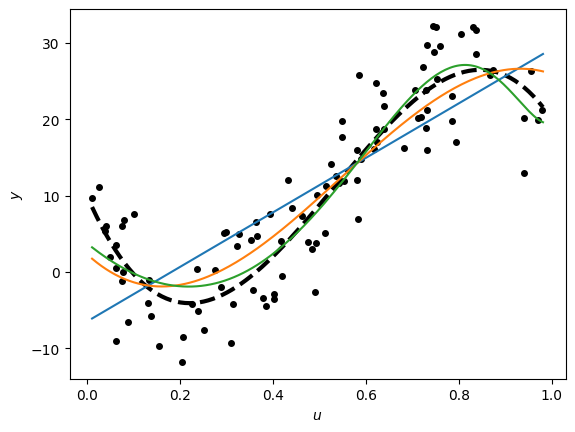

In [14]:
u_test, y_test = generate_data(3, beta, sig, n)
X_test = {}
training_loss = {}
test_loss = {}
for p in ps:
     X_test[p] = model_matrix(p, u_test)
     training_loss[p] = test_coefficients(n, betahat[p], X[p], y)
     test_loss[p] = test_coefficients(n, betahat[p], X_test[p], y_test)

#Plot the points and true line and store in the list "plots"
xx = np.arange(np.min(u), np.max(u)+5e-3, 5e-3)
yy = np.polyval(np.flip(beta), xx)
plots = [plt.plot(u, y, 'k.', markersize=8)[0], plt.plot(xx, yy, 'k--',linewidth=3)[0]]
# add the three curves
for i in ps:
    yy = np.polyval(np.flip(betahat[i]), xx)
    plots.append(plt.plot(xx, yy)[0])
plt.xlabel(r'$u$')
plt.ylabel(r'$y$')
plt.show()

New features:

Ridge introduces a penalty for large weights.

It combats overfitting (especially for high-degree polynomials).

It improves stability of the solution (avoids exploding coefficients when 
XTX is nearly singular).

#### How to Use for Unregularised Regression

To perform a standard, unregularised polynomial regression by setting gamma = 0. 
This makes the ngamma parameter zero, causing the regularization matrix to become a matrix of zeros and effectively removing the penalty.

#### Generate data from the polynomial distribution and compare unregularised and regularised regression (for different (usually small) values of gamma). 

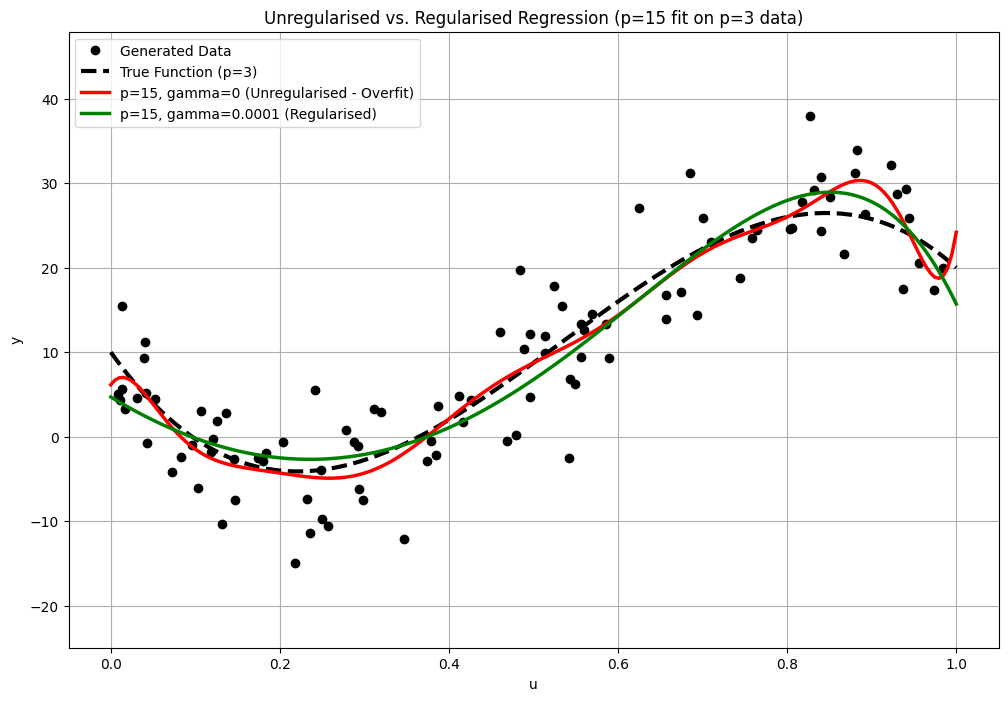

In [24]:
# Generate data for the polynomial regression example
n = 100
true_p = 3
beta_true = np.array([[10, -140, 400, -250]]).T
sig = 5
u_train, y_train = generate_data(true_p, beta_true, sig, n)

# Set up the comparison
p = 15 # Use a high-order polynomial to induce overfitting
gammas = [0, 0.0001] # Test unregularised (gamma=0) and a regularised model

# Plotting 
plt.figure(figsize=(12, 8))

# Plot the raw data points and the true function
plt.plot(u_train, y_train, 'ko', markersize=6, label='Generated Data')
xx = np.linspace(0, 1, 200).reshape(-1, 1)
yy_true = (xx ** np.arange(0, true_p + 1)) @ beta_true
plt.plot(xx, yy_true, 'k--', linewidth=3, label='True Function (p=3)')

# Train models and plot their predictions
colors = ['red', 'green']
for i, gamma in enumerate(gammas):
    # Create the model matrix. 'n' is used from the global scope.
    X_train = model_matrix(p, u_train)
    
    # Train the model. 'p' is used from the current scope.
    betahat = ridge_train(X_train, y_train, n * gamma)
    
    # To plot the fitted curve, we need a model matrix for the dense 'xx' points.
    # We must redefine 'n' temporarily for the model_matrix function call.
    n_original = n
    n = len(xx)
    X_plot = model_matrix(p, xx)
    n = n_original # Reset n
    
    y_plot = X_plot @ betahat
    
    label = f'p=15, gamma={gamma}'
    if gamma == 0:
        label += ' (Unregularised - Overfit)'
    else:
        label += ' (Regularised)'
        
    plt.plot(xx, y_plot, color=colors[i], linewidth=2.5, label=label)

plt.title('Unregularised vs. Regularised Regression (p=15 fit on p=3 data)')
plt.xlabel('u')
plt.ylabel('y')
plt.legend()
plt.ylim(min(y_train)-10, max(y_train)+10)
plt.grid(True)
plt.show()

##### Observation

Unregularised Model (gamma=0): The red line, representing the unregularised 15th-order polynomial, shows extreme overfitting. It creates a wildly fluctuating curve in an attempt to pass through every single data point. This model has high variance, meaning it has learned the random noise in the data rather than the true underlying trend.

Regularised Model (gamma=0.0001): The green line, representing the regularised 15th-order polynomial, is much smoother and more stable. Despite its high order, the regularization penalty prevents the model's coefficients from becoming too large, forcing it to find a simpler solution that captures the general trend. It successfully ignores the noise and provides an excellent approximation of the true function.

##### Optimal Polynomial Order 

Unregularised: Without regularization, the choice of polynomial order is critical and restrictive. To avoid the overfitting seen with the red line, you must choose an order that closely matches the true complexity of the data (in this case, p=3). If the order is too high, the model's performance will be very poor.

Regularised: With regularization, the choice of polynomial order is less critical and more flexible. You can safely choose a higher order (like p=15) to ensure the model is complex enough to capture the trend. The regularization penalty will automatically "simplify" the model by shrinking the coefficients of unnecessary higher-order terms, effectively preventing overfitting.

### Out-of-distribution predictions

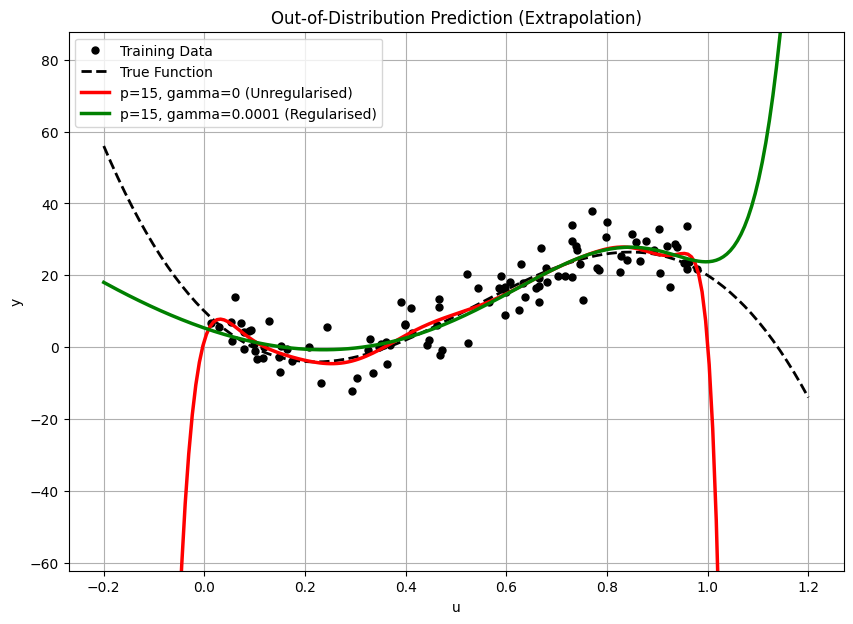

In [ ]:
# --- Experiment Setup ---
n = 100
true_p = 3
beta_true = np.array([[10, -140, 400, -250]]).T
sig = 5
u_train, y_train = generate_data(true_p, beta_true, sig, n)

# We will fit a high-order polynomial to demonstrate the effects
p = 15
gammas = [0, 0.0001] # Unregularised (gamma=0) and Regularised

# Out-of-Distribution Prediction (Extrapolation)
plt.figure(figsize=(10, 7))
xx_extra = np.linspace(-0.2, 1.2, 200).reshape(-1, 1) # Extrapolate outside [0, 1]

# Plot training data and the true function over the extended range
plt.plot(u_train, y_train, 'ko', markersize=5, label='Training Data')
yy_true_extra = (xx_extra ** np.arange(0, true_p + 1)) @ beta_true
plt.plot(xx_extra, yy_true_extra, 'k--', linewidth=2, label='True Function')

# Fit and plot for p=15 with and without regularization
colors = ['red', 'green']
for i, gamma in enumerate(gammas):
    X_train = model_matrix(p, u_train)
    betahat = ridge_train(X_train, y_train, n * gamma)

    # Temporarily set 'n' to the length of the plotting array
    n_original = n
    n = len(xx_extra)
    X_plot_extra = model_matrix(p, xx_extra)
    n = n_original # Reset n
    
    y_plot_extra = X_plot_extra @ betahat

    label = f'p=15, gamma={gamma}' + (' (Unregularised)' if gamma==0 else ' (Regularised)')
    plt.plot(xx_extra, y_plot_extra, color=colors[i], linewidth=2.5, label=label)

plt.title('Out-of-Distribution Prediction (Extrapolation)')
plt.xlabel('u')
plt.ylabel('y')
plt.legend()
plt.ylim(min(y_train)-50, max(y_train)+50) # Use a wider y-limit to see explosions
plt.grid(True)

Unregularised Model (Red Line): The model's predictions are extremely unstable outside the training data range. The curve "explodes" to wildly inaccurate values because the large coefficients it learned during overfitting are very sensitive to new inputs. This makes the model completely unreliable for extrapolation.

Regularised Model (Green Line): Even though regularization has constrained the size of its coefficients, it still does not solve the problem. c 

##### Effect of a Single Outlier

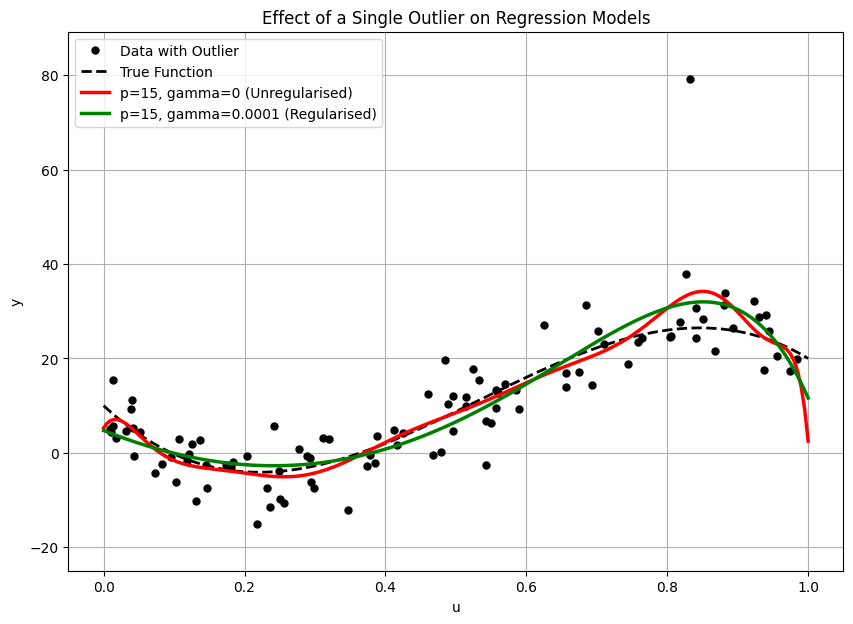

In [ ]:
# Create a copy of the data and add an outlier
y_outlier = np.copy(y_train)
y_outlier[50] = y_outlier[50] + 50 # Add a large value to one point

plt.figure(figsize=(10, 7))
xx_plot = np.linspace(0, 1, 200).reshape(-1, 1)
yy_true_plot = (xx_plot ** np.arange(0, true_p + 1)) @ beta_true

# Plot the corrupted data and the true function
plt.plot(u_train, y_outlier, 'ko', markersize=5, label='Data with Outlier')
plt.plot(xx_plot, yy_true_plot, 'k--', linewidth=2, label='True Function')

# Fit and plot for p=15 with and without regularization
for i, gamma in enumerate(gammas):
    X_train_outlier = model_matrix(p, u_train)
    betahat = ridge_train(X_train_outlier, y_outlier, n * gamma)

    # Temporarily set 'n' for plotting
    n_original = n
    n = len(xx_plot)
    X_plot = model_matrix(p, xx_plot)
    n = n_original # Reset n
    
    y_plot = X_plot @ betahat

    label = f'p=15, gamma={gamma}' + (' (Unregularised)' if gamma==0 else ' (Regularised)')
    plt.plot(xx_plot, y_plot, color=colors[i], linewidth=2.5, label=label)

plt.title('Effect of a Single Outlier on Regression Models')
plt.xlabel('u')
plt.ylabel('y')
plt.legend()
plt.ylim(min(y_train)-10, max(y_outlier)+10)
plt.grid(True)

This test shows how the models react when a single data point is corrupted, which is common in real-world datasets.

Observations

Unregularised Model (Red Line): The model is highly sensitive to the outlier. To minimize the overall error, it drastically changes its shape to get closer to that one erroneous point. This single outlier has a disproportionate effect, ruining the model's fit for the majority of the valid data points.

Regularised Model (Green Line): The model is far more robust. The regularization penalty (gamma * ||w||^2) makes it "costly" for the model to drastically change its coefficients to chase a single point. It effectively "prefers" to have a large error on the outlier while keeping its coefficients small and maintaining a good fit for the rest of the data.